In [1]:
#Mounting google and authenticating
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
#!ls /mydrive

Mounted at /content/gdrive


In [2]:
!cp /mydrive/music\ project/X_spec.pickle ./
!cp /mydrive/music\ project/y_spec.pickle ./

In [3]:
#LOADING DATA
import pickle 
pickle_off = open("X_spec.pickle", 'rb')
X_spec = pickle.load(pickle_off)

pickle_off = open("y_spec.pickle", 'rb')
y_spec = pickle.load(pickle_off)

In [21]:
import numpy as np
dataset = np.hstack((X_spec,y_spec))

In [22]:
dataset.shape

(1431, 600, 128)

In [23]:
new = dataset.reshape(1431,2,300,128)

In [32]:
new[1,0].shape

(300, 128)

(128, 300) X_spec[1]


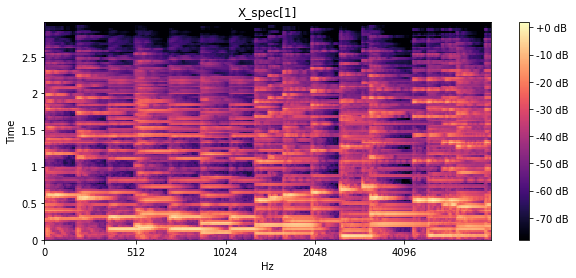

(128, 300) y_spec[1]


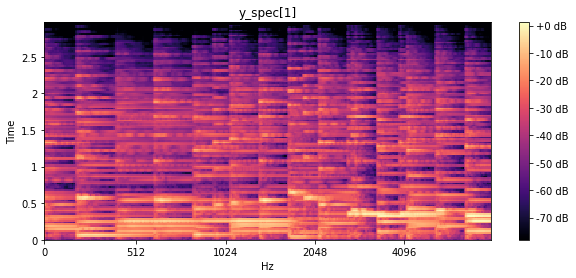

In [26]:
import matplotlib.pyplot as plt
import librosa
import librosa.display

genre_name = 'X_spec[1]'
print(X_spec[1].T.shape, genre_name)
plt.figure(figsize=(10, 4))
librosa.display.specshow(X_spec[1].T, y_axis='time', fmax=8000, x_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title(str(genre_name))
plt.show()

genre_name = 'y_spec[1]'
print(y_spec[1].T.shape, genre_name)
plt.figure(figsize=(10, 4))
librosa.display.specshow(y_spec[1].T, y_axis='time', fmax=8000, x_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title(str(genre_name))
plt.show()

(128, 300) X_spec[1]


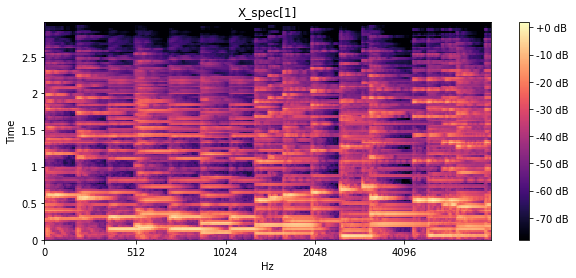

(128, 300) y_spec[1]


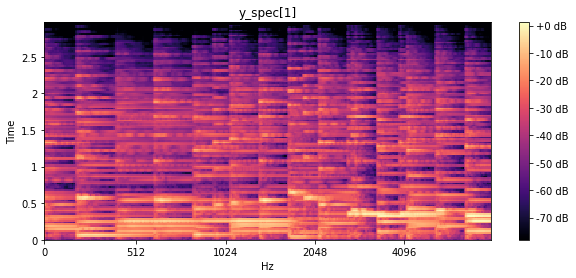

In [34]:
genre_name = 'X_spec[1]'
print(X_spec[1].T.shape, genre_name)
plt.figure(figsize=(10, 4))
librosa.display.specshow(new[1,0].T, y_axis='time', fmax=8000, x_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title(str(genre_name))
plt.show()

genre_name = 'y_spec[1]'
print(y_spec[1].T.shape, genre_name)
plt.figure(figsize=(10, 4))
librosa.display.specshow(new[1,1].T, y_axis='time', fmax=8000, x_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title(str(genre_name))
plt.show()

In [ ]:
#for train
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices(X_spec)

def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) /2
    #input_image = tf.image.rgb_to_grayscale(input_image)
    input_mask = tf.cast(input_mask, tf.float32) 
    #input_mask = tf.image.rgb_to_grayscale(input_mask)
    return input_image, input_mask

def load_image_train(datapoint):
    #input_image = tf.image.resize(datapoint[0], (128, 128))
    #input_mask = tf.image.resize(datapoint[1], (128, 128))

    input_image, input_mask = normalize(datapoint[0], datapoint[1])

    return input_image, input_mask

train = dataset.map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)


In [ ]:
#for test in tensorflow - getting ready for fitting

testd = tf.data.Dataset.from_tensor_slices(new_t)

def normalize_test(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) /2
    #input_image = tf.image.rgb_to_grayscale(input_image) 
    input_mask = tf.cast(input_mask, tf.float32) 
    #input_mask = tf.image.rgb_to_grayscale(input_mask)
    return input_image, input_mask

def load_image_test(datapoint):
    #input_image = tf.image.resize(datapoint[0], (128, 128))
    #input_mask = tf.image.resize(datapoint[1], (128, 128))

    input_image, input_mask = normalize_test(datapoint[0], datapoint[1])

    return input_image, input_mask

test = testd.map(load_image_test)